In [70]:
import hopsworks
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
import joblib
import os

In [71]:
import os

for k, v in os.environ.items():
    if "HOPS" in k:
        print(f'{k}={v}')

HOPSWORKS_API_KEY=RJFCr0ixzSbcbtDM.awhoHRF08thPKMBz0x6BoX5piWGyY3DnGXfBKY3X4pCYQjxy6ypwNycQYbwPQgqj


In [72]:
# You have to set the environment variable 'HOPSWORKS_API_KEY' for login to succeed
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/190613
Connected. Call `.close()` to terminate connection gracefully.


In [90]:
wine_fg = fs.get_feature_group(name="winequality", version=10)
query = wine_fg.select_all()
feature_view = fs.get_or_create_feature_view(name="winequality",
                                             version=10,
                                             description="Read from winequality feature group",
                                             labels=["quality"],
                                             query=query)

# Read the data

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = feature_view.train_test_split(test_size=0.2)
x_train.head()






Finished: Reading data from Hopsworks, using ArrowFlight (1.33s) 


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
1,1,7.4,0.28,0.25,11.9,0.053,25.0,148.0,0.99760,3.10,0.62,9.2
2,1,7.5,0.24,0.31,13.1,0.050,26.0,180.0,0.99884,3.05,0.53,9.1
4,1,8.3,0.14,0.45,1.5,0.039,18.0,98.0,0.99215,3.02,0.56,11.0
9,1,5.6,0.42,0.34,2.4,0.022,34.0,97.0,0.98915,3.22,0.38,12.8
10,1,6.3,0.36,0.30,4.8,0.049,14.0,85.0,0.99320,3.28,0.39,10.6


In [110]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

norm_fit = norm.fit(x_train)
norm_x_train = norm_fit.transform(x_train)
norm_x_test = norm_fit.transform(x_test)

print(norm_x_train.shape)
print(y_train.shape)

(4263, 12)
(4263, 1)


In [111]:
model = RandomForestClassifier()
model.fit(norm_x_train, y_train.values.ravel())

RandomForestClassifier()

In [114]:
norm_x_train.head()


AttributeError: 'numpy.ndarray' object has no attribute 'head'

Text(0.5, 1.0, 'Accuracy Score: 0.5628517823639775')

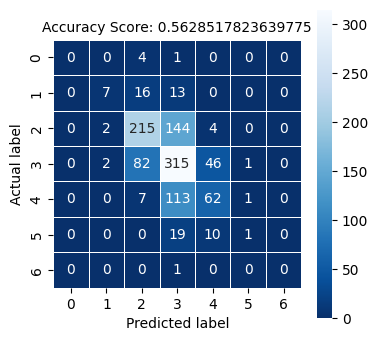

In [116]:
predictions = model.predict(norm_x_test)
score = model.score(norm_x_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5,
                square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=10)



In [81]:

mr = project.get_model_registry()


model_dir="wine_model"
if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)

joblib.dump(model, model_dir + "/wine_model.pkl")
plt.savefig(model_dir + "/confusion_matrix.png")

input_schema = Schema(x_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema, output_schema)

wine_model = mr.python.create_model(
    name="wine_model", 
    metrics={"accuracy" : score},
    model_schema=model_schema,
    description="Wine Quality Predictor"
)


wine_model.save(model_dir)


Connected. Call `.close()` to terminate connection gracefully.


Model export complete: 100%|██████████| 6/6 [00:50<00:00,  8.39s/it]                   

Model created, explore it at https://c.app.hopsworks.ai:443/p/190613/models/wine_model/5


Model(name: 'wine_model', version: 5)

<Figure size 640x480 with 0 Axes>

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# score = 0.0
# a = 0
# for i in range(200):
#     model = KNeighborsClassifier(n_neighbors=i+1)
#     scoreLocal = model_evaluation(model, x_train, x_test, y_train, y_test)
#     if (scoreLocal > score):
#         score = scoreLocal
#         a = i
# print(score + " " + a)